In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [92]:
data = pd.read_csv(r'C:\Users\anssa\OneDrive\Documents\drug_classifier_genai_app\data\Drug.csv')
data

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


In [93]:
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [94]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB
None


In [95]:
quantitative_stats = data.describe()
print("Descriptive statistics for quantitative features:")
print(quantitative_stats)

# Frequency table for categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']

for feature in categorical_features:
    print("\nFrequency table for", feature, ":")
    freq_table = data[feature].value_counts()
    freq_table_percentage = data[feature].value_counts(normalize=True) * 100
    freq_table_combined = pd.concat([freq_table, freq_table_percentage], axis=1)
    freq_table_combined.columns = ['Count', 'Percentage']
    print(freq_table_combined)

Descriptive statistics for quantitative features:
              Age          Na           K
count  200.000000  200.000000  200.000000
mean    44.315000    0.697095    0.050174
std     16.544315    0.118907    0.017611
min     15.000000    0.500169    0.020022
25%     31.000000    0.583887    0.035054
50%     45.000000    0.721853    0.049663
75%     58.000000    0.801494    0.066000
max     74.000000    0.896056    0.079788

Frequency table for Sex :
     Count  Percentage
Sex                   
M      104        52.0
F       96        48.0

Frequency table for BP :
        Count  Percentage
BP                       
HIGH       77        38.5
LOW        64        32.0
NORMAL     59        29.5

Frequency table for Cholesterol :
             Count  Percentage
Cholesterol                   
HIGH           103        51.5
NORMAL          97        48.5

Frequency table for Drug :
       Count  Percentage
Drug                    
drugY     91        45.5
drugX     54        27.0
drugA     

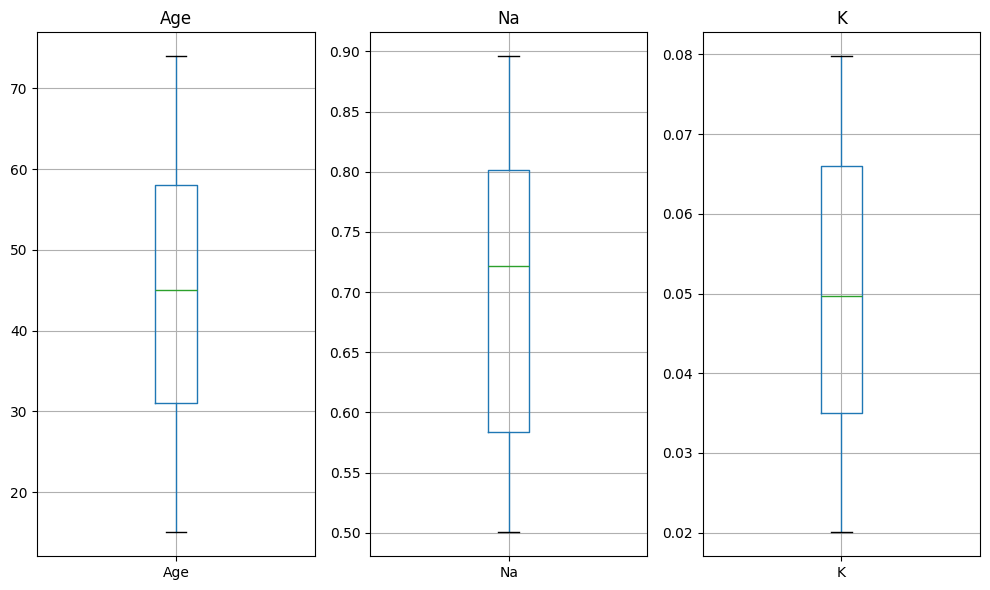

In [96]:
quantitative_features = ['Age','Na','K']

# Visual Inspection with Boxplot

def box_plot_analysis(data, features):
    plt.figure(figsize=(10, 6))
    for i, feature in enumerate(features, start=1):
        plt.subplot(1, len(features), i)
        data.boxplot(column=feature)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

box_plot_analysis(data, quantitative_features)

In [97]:
# Method 3: Z-Score Method for Outlier Detection
def detect_outliers_zscore(data, features, threshold=3):
    outliers = pd.DataFrame()
    for feature in features:
        z_scores = (data[feature] - data[feature].mean()) / data[feature].std()
        outliers[feature] = data[feature][abs(z_scores) > threshold]
    return outliers

outliers_zscore = detect_outliers_zscore(data, quantitative_features)
print("\nOutliers detected using Z-score method:")
print(outliers_zscore)


Outliers detected using Z-score method:
Empty DataFrame
Columns: [Age, Na, K]
Index: []


In [98]:
# Method 4: Interquartile Range (IQR) Method for Outlier Detection
def detect_outliers_iqr(data, features):
    outliers = pd.DataFrame()
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = data[feature][(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

outliers_iqr = detect_outliers_iqr(data, quantitative_features)
print("\nOutliers detected using IQR method:")
print(outliers_iqr)


Outliers detected using IQR method:
Empty DataFrame
Columns: [Age, Na, K]
Index: []


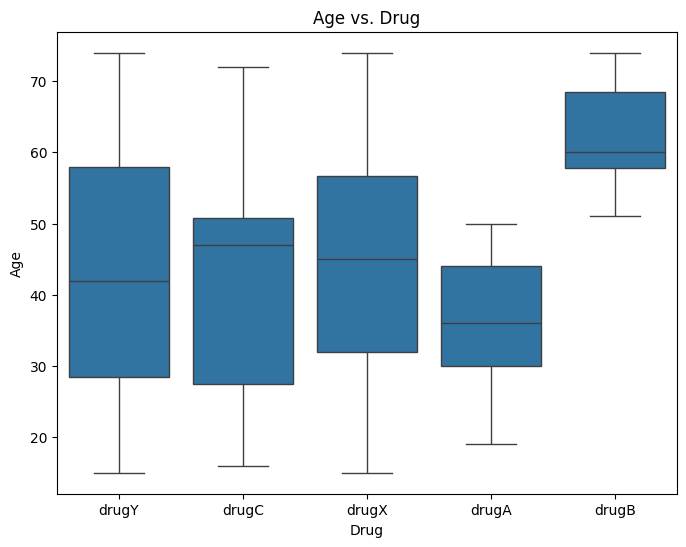

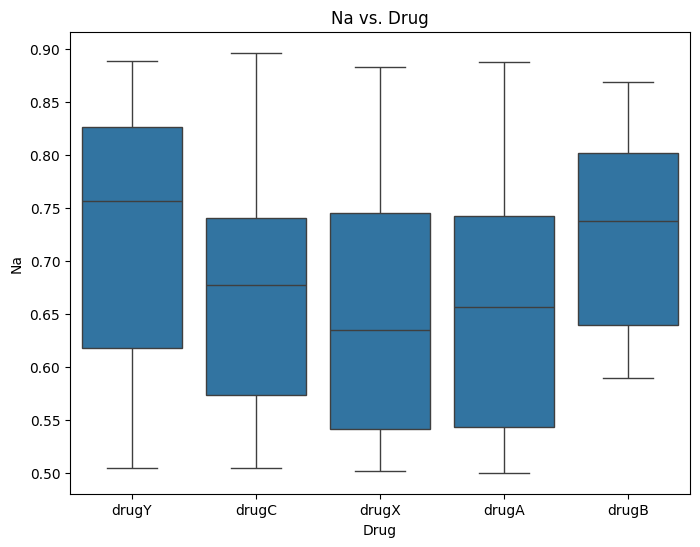

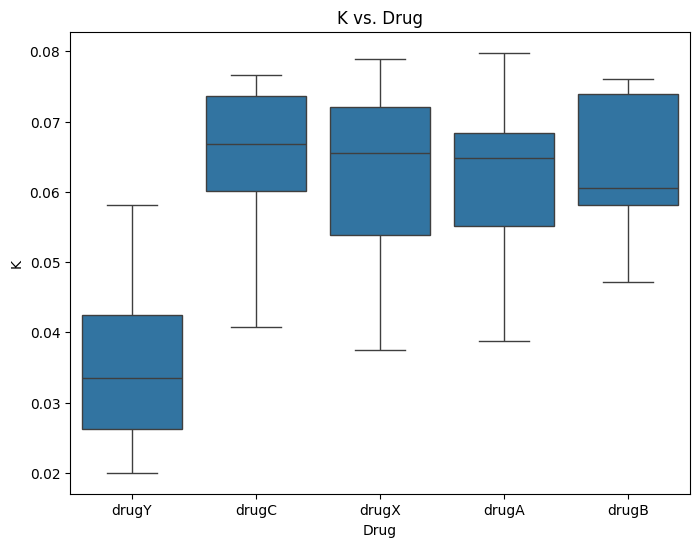

In [99]:
import seaborn as sns

for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Drug', y=feature, data=data)
    plt.title(f'{feature} vs. Drug')
    plt.xlabel('Drug')
    plt.ylabel(feature)  
    plt.show()

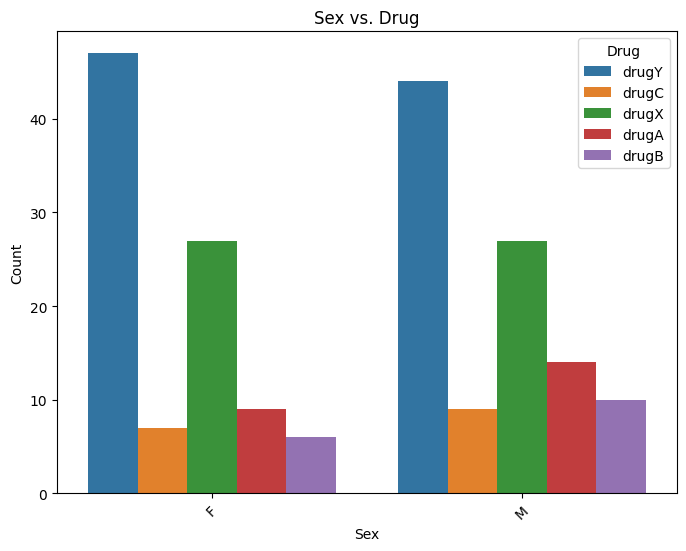

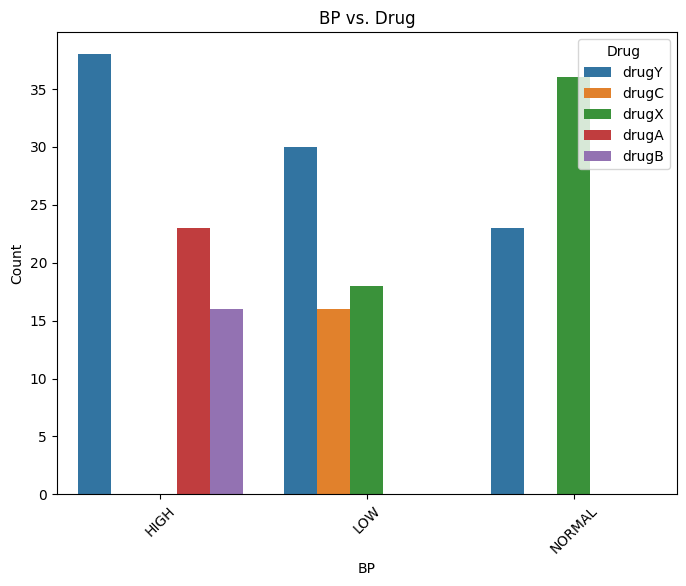

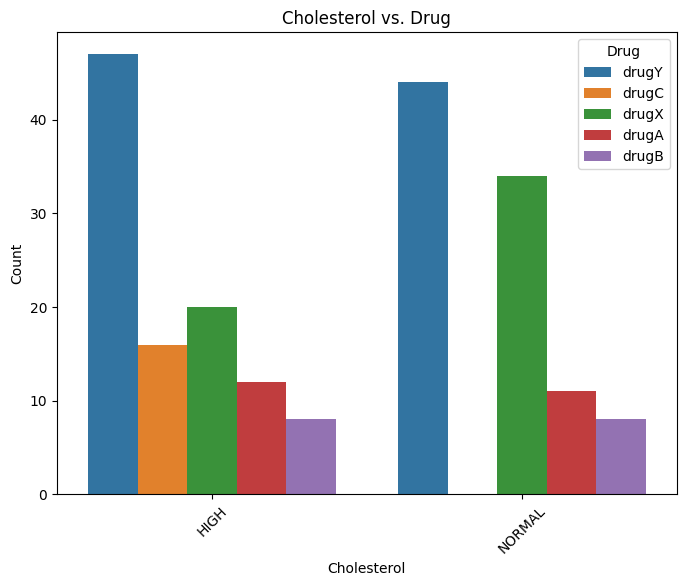

C:\Users\anssa\AppData\Local\Temp\ipykernel_3916\3047403556.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Drug', loc='upper right')


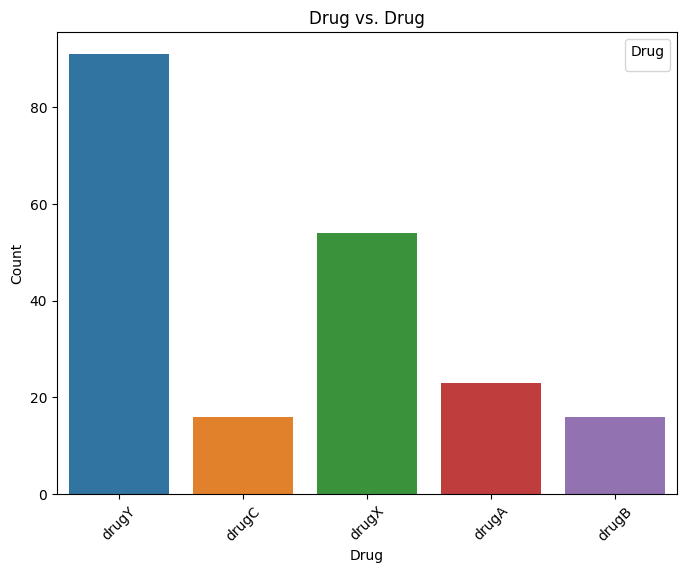

In [100]:
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Drug', data=data)
    plt.title(f'{feature} vs. Drug')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.legend(title='Drug', loc='upper right')
    plt.show()

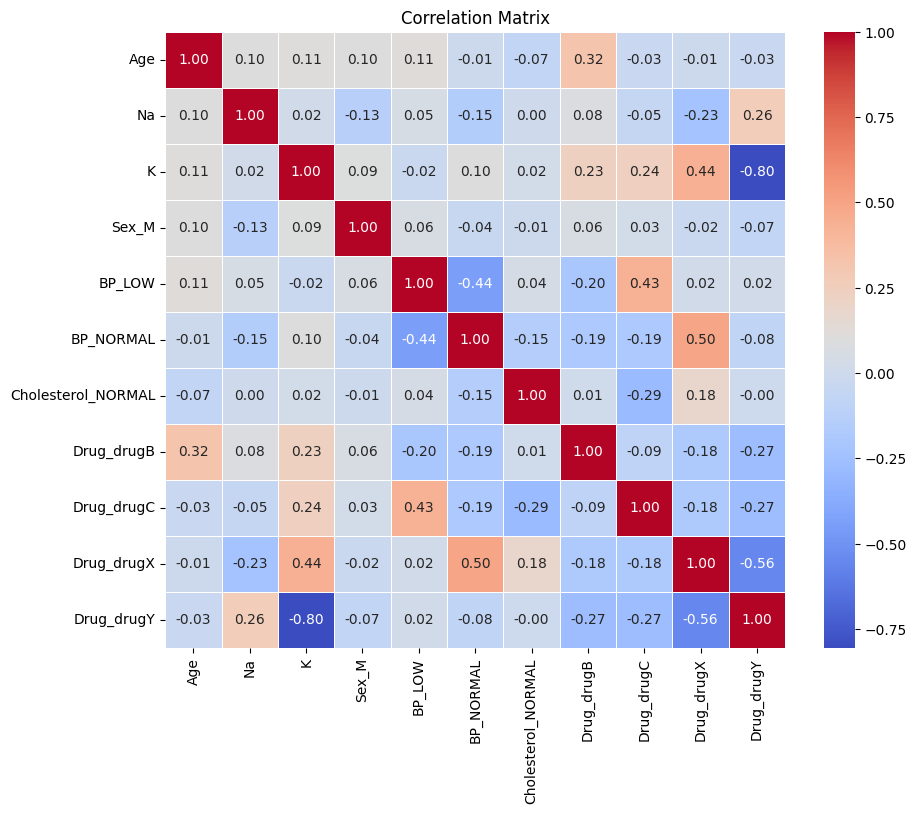

In [101]:
encoded_data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [102]:
from scipy.stats import pearsonr

numerical_features = ['Na', 'K', 'Age']

for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        correlation_coefficient, p_value = pearsonr(data[feature1], data[feature2])
        print(f"Correlation between {feature1} and {feature2}:")
        print(f"Pearson's correlation coefficient: {correlation_coefficient}")
        print(f"P-value: {p_value}")
        if p_value < 0.05:
            print("Statistically significant correlation\n")
        else:
            print("No statistically significant correlation\n")

Correlation between Na and K:
Pearson's correlation coefficient: 0.017334587466501242
P-value: 0.8075175505627591
No statistically significant correlation

Correlation between Na and Age:
Pearson's correlation coefficient: 0.10037117622299323
P-value: 0.157321042411135
No statistically significant correlation

Correlation between K and Age:
Pearson's correlation coefficient: 0.11149123744762576
P-value: 0.11600960745090874
No statistically significant correlation



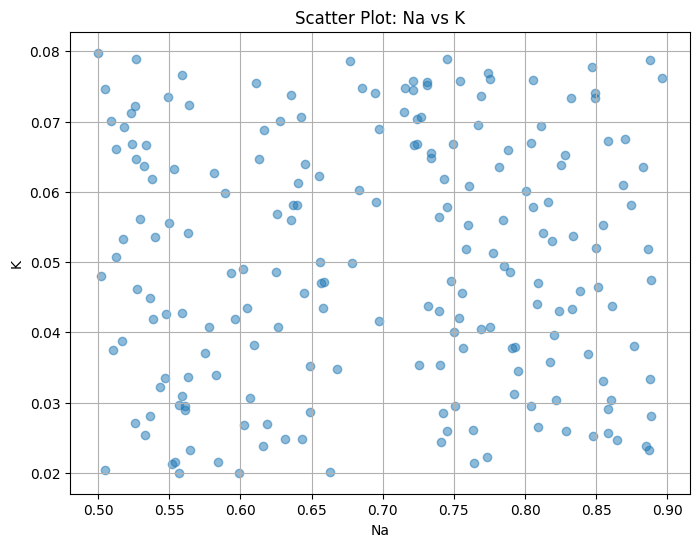

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Na'], data['K'], alpha=0.5)
plt.title('Scatter Plot: Na vs K')
plt.xlabel('Na')
plt.ylabel('K')
plt.grid(True)
plt.show()

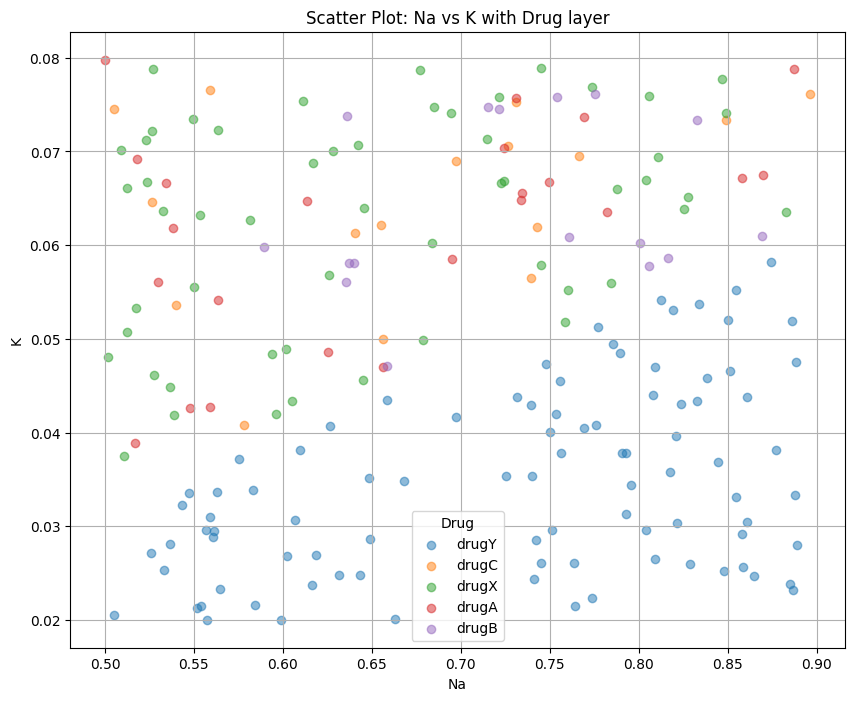

In [104]:
plt.figure(figsize=(10, 8))
for drug_category in data['Drug'].unique():
    plt.scatter(data[data['Drug'] == drug_category]['Na'], 
                data[data['Drug'] == drug_category]['K'], 
                alpha=0.5, label=drug_category)

plt.title('Scatter Plot: Na vs K with Drug layer')
plt.xlabel('Na')
plt.ylabel('K')
plt.legend(title='Drug')
plt.grid(True)
plt.show()

In [105]:
from scipy.stats import chi2_contingency

# Contingency table between Drug and Sex
contingency_table = pd.crosstab(data['Drug'], data['Sex'])

# Performing chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 2.119248418109203
P-value: 0.7138369773987128
Degrees of freedom: 4
Expected frequencies table:
[[11.04 11.96]
 [ 7.68  8.32]
 [ 7.68  8.32]
 [25.92 28.08]
 [43.68 47.32]]


In [106]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
sex_classes = ['F', 'M']
bp_classes = ['LOW', 'NORMAL', 'HIGH']
cholesterol_classes = ['NORMAL', 'HIGH']
drug_classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

ordinal_encoder = OrdinalEncoder(categories=[sex_classes, bp_classes, cholesterol_classes])
data[['Sex', 'BP', 'Cholesterol']] = ordinal_encoder.fit_transform(data[['Sex', 'BP', 'Cholesterol']])

label_encoder = LabelEncoder()
data['Drug'] = label_encoder.fit_transform(data['Drug'])

data.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,0.0,2.0,1.0,0.792535,0.031258,4
1,47,1.0,0.0,1.0,0.739309,0.056468,2
2,47,1.0,0.0,1.0,0.697269,0.068944,2
3,28,0.0,1.0,1.0,0.563682,0.072289,3
4,61,0.0,0.0,1.0,0.559294,0.030998,4


In [107]:
print(data['Sex'].unique())
print(data['BP'].unique())
print(data['Cholesterol'].unique())

[0. 1.]
[2. 0. 1.]
[1. 0.]


In [108]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns=['Drug'])  # Features
y = data['Drug']  # Target variable

# Splitting the dataset into training and testing sets (50-50 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (150, 6) (150,)
Testing set shape (X_test, y_test): (50, 6) (50,)


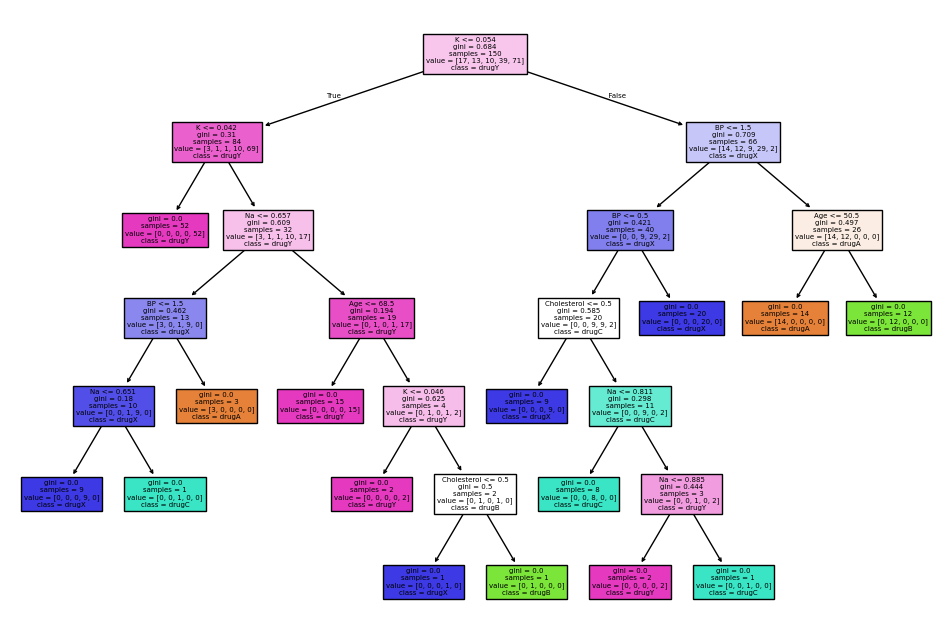

In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import joblib

# Remove 'Sex_encoded', 'Na', and 'K' features
# X_train_filtered = X_train.drop(columns=['Sex', 'Na', 'K'])

# Train the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X_train.columns, class_names=drug_classes, filled=True)
plt.show()

In [110]:
joblib.dump(tree_model,'model_df.pkl')

['model_df.pkl']

In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on training set
y_train_pred = tree_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=drug_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluate on testing set
# X_test_filtered = X_test.drop(columns=['Sex', 'Na', 'K'])
y_test_pred = tree_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=drug_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Set Metrics:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        17
       drugB       1.00      1.00      1.00        13
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        39
       drugY       1.00      1.00      1.00        71

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Confusion Matrix:
[[17  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 39  0]
 [ 0  0  0  0 71]]

Testing Set Metrics:
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      0.83      0.91         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.50      0.67         6
       drugX       0.87      0.87      0.87        15
       drug

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with increased maximum iterations
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Display the logistic regression equation and coefficients
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

print("Logistic Regression Equation:")
print("log(odds) = ", end="")
for i, (feature, coef) in enumerate(zip(X_train.columns,coefficients)):
    if i == 0:
        print(f"{coef:.2f} * {feature}", end="")
    else:
        print(f" + {coef:.2f} * {feature}", end="")
print(f" + {intercept:.2f}")
joblib.dump(logistic_model,'model_logistic.pkl')

Logistic Regression Equation:
log(odds) = -0.83 * Age + 0.10 * Sex + 2.18 * BP + -0.11 * Cholesterol + -0.64 * Na + 0.99 * K + -0.84


['model_logistic.pkl']

In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training set
y_train_pred = logistic_model.predict(X_train_scaled)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")

# Print classification report on the training set
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=drug_classes))

# Print confusion matrix on the training set
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Make predictions on the testing set
y_test_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")

# Print classification report on the testing set
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=drug_classes))

# Print confusion matrix on the testing set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Set Metrics:
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        17
       drugB       1.00      1.00      1.00        13
       drugC       1.00      0.90      0.95        10
       drugX       0.97      0.90      0.93        39
       drugY       0.95      1.00      0.97        71

    accuracy                           0.97       150
   macro avg       0.98      0.96      0.97       150
weighted avg       0.97      0.97      0.97       150

Confusion Matrix:
[[17  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0  9  1  0]
 [ 0  0  0 35  4]
 [ 0  0  0  0 71]]

Testing Set Metrics:
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.17      0.29         6
       drugX       0.75      1.00      0.86        15
       drug

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# import joblib


forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)


joblib.dump(model, "model_rf.pkl")

['model_rf.pkl']

In [115]:
# Evaluate on training set
y_train_pred = forest_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=drug_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluate on testing set
# X_test_filtered = X_test.drop(columns=['Sex', 'Na', 'K'])
y_test_pred = tree_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=drug_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Set Metrics:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        17
       drugB       1.00      1.00      1.00        13
       drugC       1.00      1.00      1.00        10
       drugX       1.00      1.00      1.00        39
       drugY       1.00      1.00      1.00        71

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Confusion Matrix:
[[17  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 39  0]
 [ 0  0  0  0 71]]

Testing Set Metrics:
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      0.83      0.91         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.50      0.67         6
       drugX       0.87      0.87      0.87        15
       drug

In [116]:
joblib.dump(ordinal_encoder, 'ordinal_encoder.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']